In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Real_Estate_Sales_2001-2022_GL.csv")

<ipython-input-2-44b6d8d25bf6>:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Real_Estate_Sales_2001-2022_GL.csv")


In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [5]:
# checking for null values
df.isna().sum()

,0
Serial Number,0
List Year,0
Date Recorded,2
Town,0
Address,51
Assessed Value,0
Sale Amount,0
Sales Ratio,0
Property Type,382446
Residential Type,398389


In [6]:
# dropping columns with a majority of missing values
df = df.drop(axis=1, columns=['Non Use Code',
                              'Assessor Remarks',
                              'OPM remarks',
                              'Location'
                              ])
df.head(3)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN


In [7]:
df.rename(columns={'Date Recorded': 'Date'}, inplace=True)

In [8]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')

In [9]:
df["Property Type"].value_counts()

,count
Property Type,
Single Family,401612
Residential,151064
Condo,105420
Two Family,26408
Three Family,12586
Vacant Land,7824
Commercial,5987
Four Family,2150
Apartments,1327


In [13]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q')
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.strftime('%B')

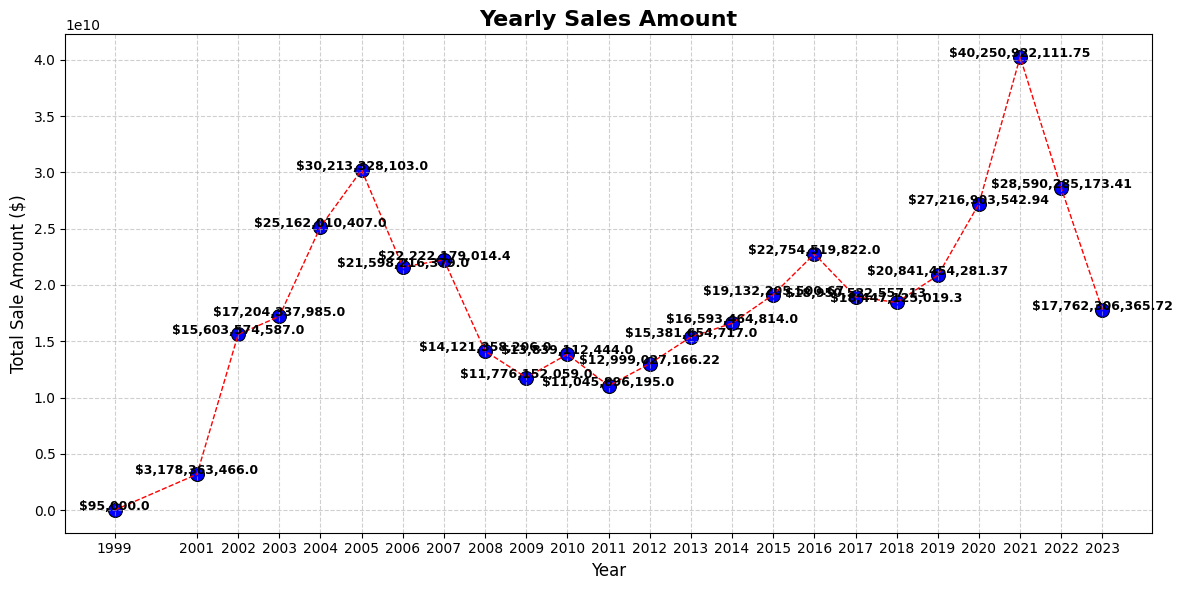

In [11]:
sales_year = df.groupby('Year')['Sale Amount'].sum().reset_index()

# Plot sales by year using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_year, x='Year', y='Sale Amount', s=100, color='blue', edgecolor='black', marker='o')

# Add a line plot to connect scatter points for a clearer trend view
sns.lineplot(data=sales_year, x='Year', y='Sale Amount', color='red', linewidth=1, linestyle='--')

# Annotate each point with its value, adjusting positions for better readability
for i, row in sales_year.iterrows():
    # Alternate position of text labels above and below the points
    offset = 20000 if i % 2 == 0 else -30000
    plt.text(row['Year'], row['Sale Amount'] + offset, f"${row['Sale Amount']:,}",
             ha='center', fontsize=9, fontweight='bold')

# Plot details
plt.title('Yearly Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sale Amount ($)', fontsize=12)
plt.xticks(sales_year['Year'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

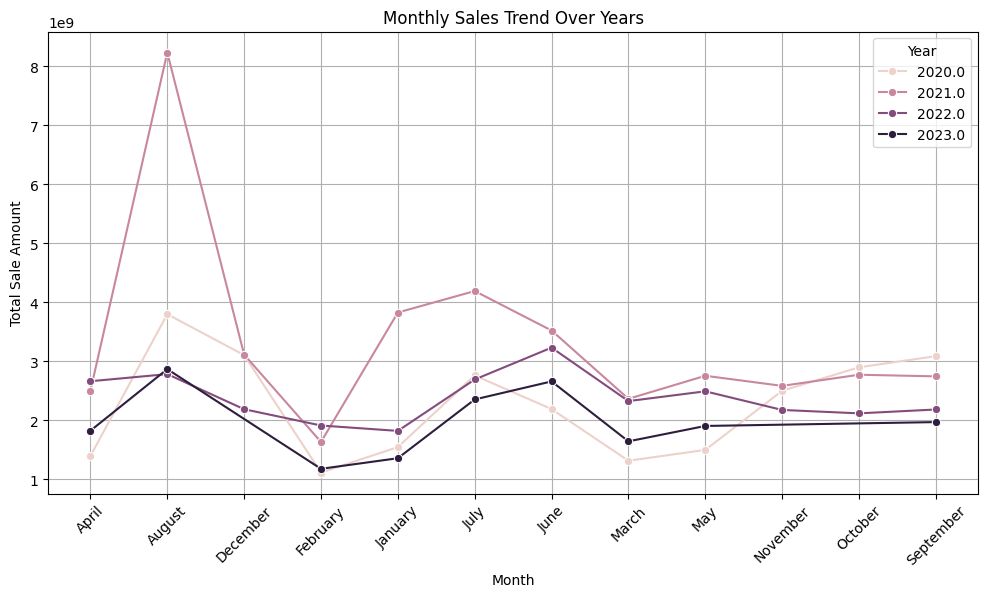

In [21]:
df_filtered = df[df['Year'].isin([2020, 2021, 2022, 2023])]
monthly_sales = df_filtered.groupby(['Year', 'Month Name']).agg({'Sale Amount': 'sum'}).reset_index()

# Plot sales over time by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month Name', y='Sale Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sale Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-22-f09ea784f2cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=residential_summary, x='Residential Type', y='mean', palette='viridis', edgecolor='black')


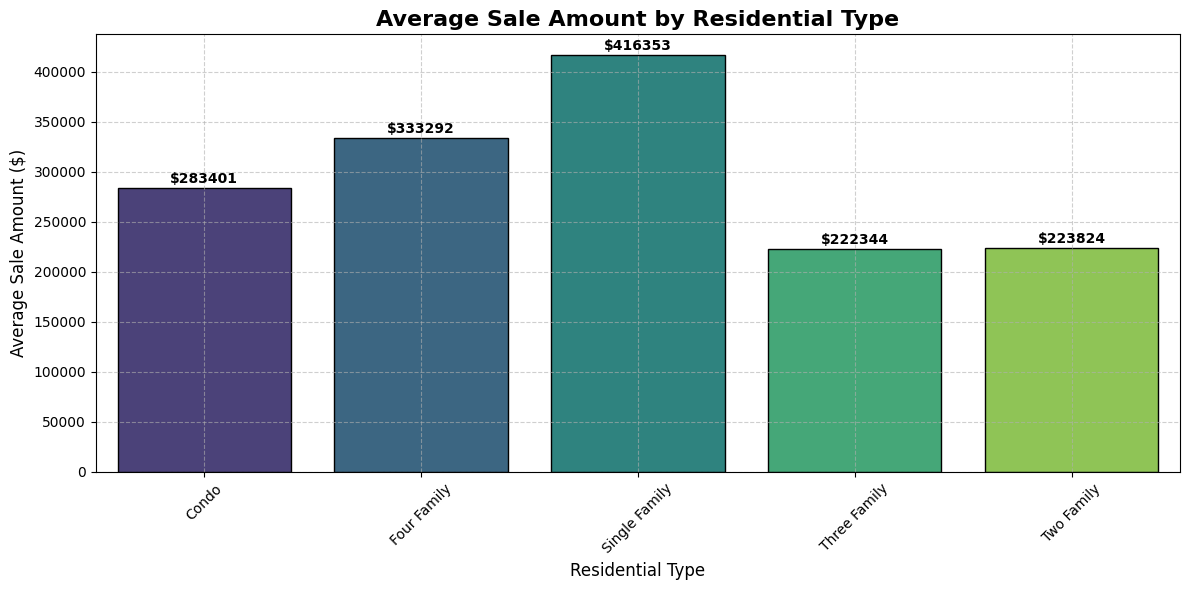

In [22]:
# Group and summarize sales by Residential Type
residential_summary = df.groupby('Residential Type')['Sale Amount'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Visualize average sales using a colorful bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=residential_summary, x='Residential Type', y='mean', palette='viridis', edgecolor='black')

# Annotate bars with the average sale amounts
for i, row in residential_summary.iterrows():
    plt.text(i, row['mean'] + 5000, f"${row['mean']:.0f}", ha='center', fontsize=10, fontweight='bold', color='black')

plt.title('Average Sale Amount by Residential Type', fontsize=16, fontweight='bold')
plt.xlabel('Residential Type', fontsize=12)
plt.ylabel('Average Sale Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

<ipython-input-23-d0c221db3d7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_cities, x='Sale Amount', y='Town', palette='coolwarm', edgecolor='black')


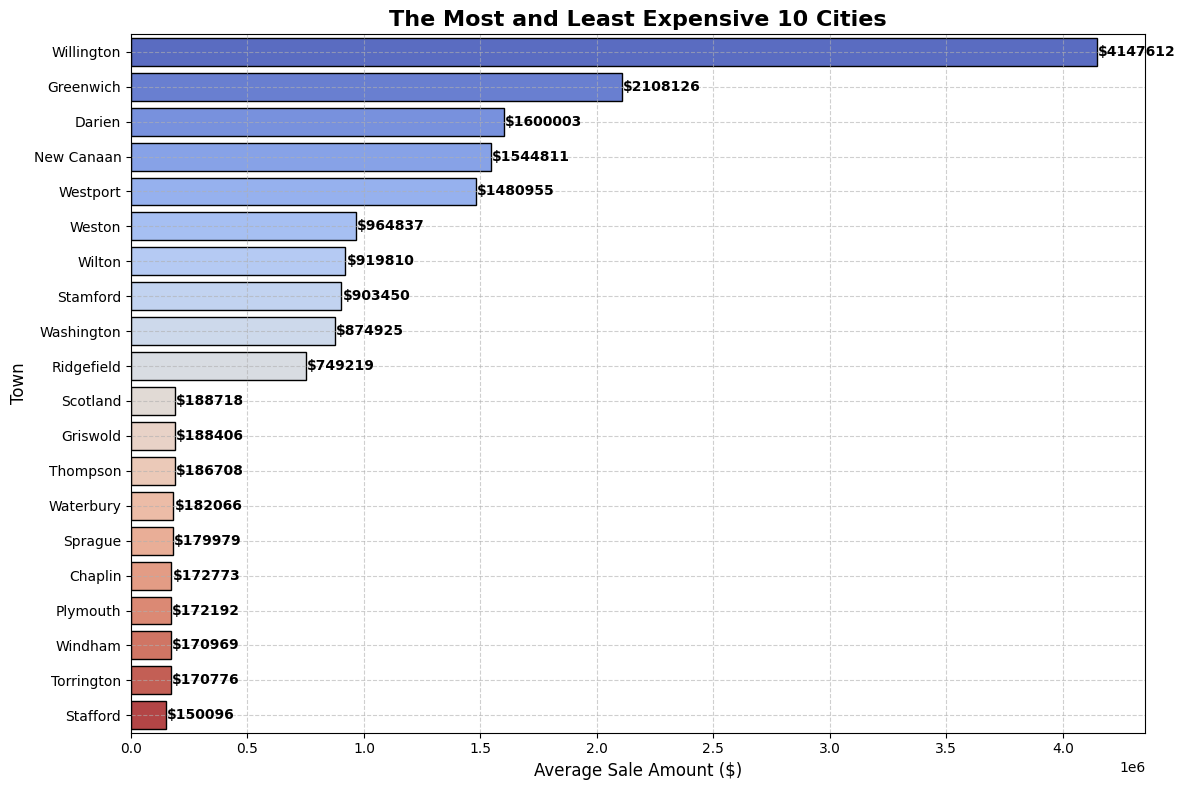

In [23]:
# Group by Town and calculate the average sale amount
city_avg_sales = df.groupby('Town')['Sale Amount'].mean().reset_index()

# Sort the towns by average sale amount in descending order
sorted_cities = city_avg_sales.sort_values(by='Sale Amount', ascending=False).reset_index(drop=True)

# Select the top 10 most expensive and bottom 10 least expensive cities
top_10_cities = sorted_cities.head(10)
bottom_10_cities = sorted_cities.tail(10)
top_bottom_cities = pd.concat([top_10_cities, bottom_10_cities]).reset_index(drop=True)


plt.figure(figsize=(12, 8))
sns.barplot(data=top_bottom_cities, x='Sale Amount', y='Town', palette='coolwarm', edgecolor='black')

for index, row in top_bottom_cities.iterrows():
    plt.text(row['Sale Amount'] + 5000, index, f"${row['Sale Amount']:.0f}", va='center', fontsize=10, fontweight='bold', color='black')

plt.title('The Most and Least Expensive 10 Cities', fontsize=16, fontweight='bold')
plt.xlabel('Average Sale Amount ($)', fontsize=12)
plt.ylabel('Town', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

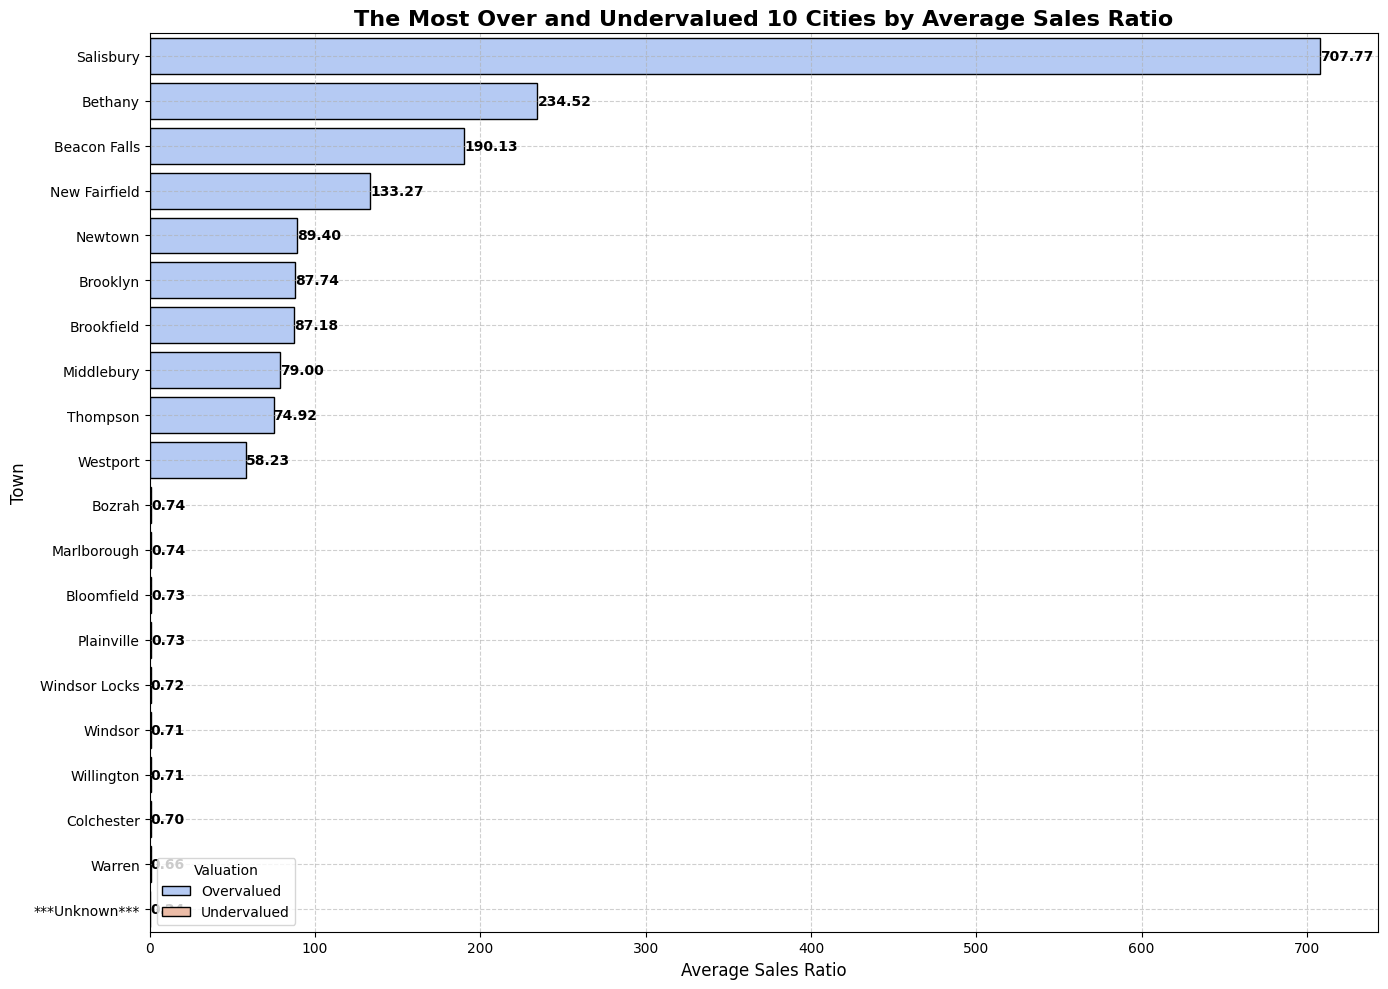

In [27]:
city_sales_ratio = df.groupby('Town')['Sales Ratio'].mean().reset_index()

# Add a column to determine whether the city is overvalued or undervalued
city_sales_ratio['Valuation'] = city_sales_ratio['Sales Ratio'].apply(
    lambda x: 'Overvalued' if x > 1 else 'Undervalued'
)

sorted_cities_ratio = city_sales_ratio.sort_values(by='Sales Ratio', ascending=False).reset_index(drop=True)

# Select top 20 overvalued and bottom 20 undervalued cities
top_10_overvalued = sorted_cities_ratio.head(10)
bottom_10_undervalued = sorted_cities_ratio.tail(10)

top_bottom_cities_ratio = pd.concat([top_10_overvalued, bottom_10_undervalued]).reset_index(drop=True)

# Plotting the valuation of top and bottom cities based on sales ratio
plt.figure(figsize=(14, 10))
sns.barplot(data=top_bottom_cities_ratio, x='Sales Ratio', y='Town', hue='Valuation', palette='coolwarm', edgecolor='black')

for index, row in top_bottom_cities_ratio.iterrows():
    plt.text(row['Sales Ratio'] + 0.01, index, f"{row['Sales Ratio']:.2f}", va='center', fontsize=10, fontweight='bold', color='black')

plt.title('The Most Over and Undervalued 10 Cities by Average Sales Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Average Sales Ratio', fontsize=12)
plt.ylabel('Town', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()